In [1]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
from IPython.display import clear_output # clears output of cell, say to show multiple plots but show only most recent one

# Dataset

Task: To predict nationality a name (varying length) belongs to.  
Therefore, sequence model since sequence of characters, have to encode each character and predict one class (usual softmax) 

  

---

  
Sequence Tasks:  
Sequence to Class (input is sequence, output is just one class) - what we are doing currently   
Sequence to Sequence Type 1 (input is sequence, output is sequence where there is an output corresponding to each item in the input e.g. POS)  
Sequence to Class (input is sequence, output is sequence, but there is not one output for each word, but be more or less e.g. transliteration - converting english word to hindi)

In [0]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt','r') as f:
  for line in f:
    line = line.split(',')
    name = line[0].strip()
    lang = line[1].strip()
    if not lang in languages:
      languages.append(lang)
    X.append(name)
    y.append(lang)
    data.append((name, lang))

In [7]:
n_languages = len(languages)
print(n_languages)

18


There are 18 languages in this dataset.

In [8]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [9]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


# Train-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 61, stratify = y)

(Both X and y should have the same dimensions)

In [11]:
print(X_train[:20])

['Kaufman', 'Chandler', 'Agar', 'Essa', 'Makhagonov', 'Prokudin', 'Porus', 'Lowry', 'Nezvigin', 'Cove', 'Peach', 'Newlands', 'Bajov', 'Chukhnovsky', 'Naser', 'Gaspirovich', 'Vykhodtsev', 'Chuvilkin', 'Maksimchuk', 'Dandy']


In [12]:
print(len(X_train), len(X_test))

16040 4010


# Encoding names and languages

Since output is a class, can use one hot encoding easily.  
But input is a sequence, so have to encode each character.

In [0]:
# list of all characters possible in a name
all_letters = string.ascii_letters + " .,;"
n_letters = len(all_letters)

Encode the name

In [0]:
# Let encoding be one hot encoding for each character, where the hot bit is the index of the char in the above string of all letters
def name_rep(name):
  rep = torch.zeros(len(name), 1, n_letters)
  for index, letter in enumerate(name):
    pos = all_letters.find(letter)
    rep[index][0][pos] = 1
  return rep

Encode the language

In [0]:
# Don't require one hot encoding, just label sufficient
def lang_rep(lang):
  return torch.tensor([languages.index(lang)], dtype = torch.long)

In [16]:
name_rep('Almeida')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

7 letters in name, so 7 vectors

In [17]:
lang_rep('Dutch')

tensor([7])

Label of Dutch in languages array

# Basic Visualisation

Distribution of languages in our dataset

In [0]:
count = {}

for l in languages:
  count[l] = 0
for d in data:
  count[d[1]] += 1

In [19]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


Highly non-uniform

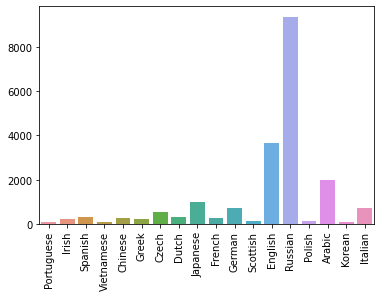

In [20]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation = 90)
plt.show()

Model might learn Russian names too well and predict them well since lots of data, but less training on the rest.  
Hence, have to see not the overall accuracy, but accuracy for each language.

Therefore, baseline is not to pick names from each language equally, but pick according to the distribution, more for Russian.

Thus, baseline testing is easy, but training isn't

# Basic network and testing inference

In [0]:
class RNN_net(nn.Module):
  # just setting up layers, not computing anything
  # input_size : size of encoding of one character in the input (i.e. number of letters, here)
  # hidden_size : the hidden layer though looks like one (for a single unit of the RNN) can be any number of layers
  # output_size : the number of labels (number of languages, here)
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN_net, self).__init__() # parent's (NN's) init
    self.hidden_size = hidden_size

    # both below are Linear (fully connected)
    # just mention input size and output size. Weights, biases etc taken care of by library (encapsulated)

    # i2h is the intersection of the previous character's output and current input character, hence concatenation of hidden size (previous input size - coming out of hidden layer) and input size (current input size). Output should of course be hidden size again
    self.i2h = nn.Linear(input_size + hidden_size, hidden_size) # "concatenation (i.e. both preserved)", not addition (corresponding elements added), of input and hidden of previous
    
    # i2o is the intersection of the h and the output o. (the final output layer part). Input is the computed h (hidden_size) and the current input (input_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)

    # Note only 1 layer used for both above transformations, but can have more
    
    # Final output
    self.softmax = nn.LogSoftmax(dim = 1)


  # where layers are put to use
  def forward(self, input_, hidden):
    combined = torch.cat((input_, hidden), 1) # concatenate hidden and input in right direction (1, here. 1 means column always in a 2D vector, and usually "along". So concatenate - NOT ADDS - along row. Next to each other)
    hidden = self.i2h(combined) # comput hidden value
    output = self.i2o(combined) # compute output
    output = self.softmax(output) # compute softmax
    return output, hidden # return both output and hidden

  # the first time (beginning of sequence) the hidden vector is not present, so call this function the first time
  def init_hidden(self):
    return torch.zeros(1, self.hidden_size) # Randomly initialised to 1, can use something else too

Now, instantiate model (hyperparameters)

In [0]:
# number of hidden layers
n_hidden = 128 # compromise between overfitting and having less data

In [0]:
net = RNN_net(n_letters, n_hidden, n_languages)

Now, unlike CNNs, infer before testing.

In [0]:
def infer(net, name):
  net.eval() # put network in eval mode during inference (not train mode)
  name_ohe = name_rep(name) # one hot encoding
  hidden = net.init_hidden() # initialise hidden vector for first instance of RNN, using encapsulated function

  # name_ohe size = (n_letters, 1, sizeofword)
  # here, iterating through each character. For each character in OHE, invoking forward ("net")
  for i in range(name_ohe.size()[0]):

    # name_ohe[i] = a vector of first character of OHE of all letters in the word (since RNN always expects a vector - 1 dimension)
    # note the instantiated hidden layer is used only once. Thereafter, the new computed hidden used each time
    # "output" for each iteration is the output of FFNN of one RNN unit, for that iteration (thus, overwritten each time). Hence at end of word, "output" contains the output of the final unit of the RNN (answer)
    
    output, hidden = net(name_ohe[i], hidden)

  return output

While inferring, an optimisation could be done, by removing softmax layer in the "forward" function of the model, since argmax will remain same before and after an argmax. It's only a computationally heavy operation.

In [34]:
output = infer(net, X_train[0])

print(X_train[0])

# Softmax returned so argmax
index = torch.argmax(output)
print(output)
print(index)

Kaufman
tensor([[-3.0253, -2.9496, -2.7226, -2.7676, -2.7876, -2.8880, -2.8898, -2.9612,
         -2.9226, -2.9314, -2.9943, -2.8570, -2.9803, -2.8965, -2.8943, -2.9274,
         -2.7563, -2.9384]], grad_fn=<LogSoftmaxBackward>)
tensor(2, grad_fn=<NotImplemented>)


Says Kaufman belongs to nationality of index 3.  
Note: without training, outputs if all classes are roughly same - doesn't know how to differentiate yet.

# Evaluate model

In [0]:
# just to generate random inputs from the dataset since in the data, languages are present in an ordered manner
def dataloader(npoints, X_, y_):
  to_ret = []
  for i in range(npoints):
    index_ = np.random.randint(len(X_))
    name, lang = X_[index_], y_[index_]
    to_ret.append((name, lang, name_rep(name), lang_rep(lang))) # append() takes exactly one argument so append as tuple
  return to_ret

In [41]:
dataloader(2, X_train, y_train)

[('Kouri',
  'Arabic',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Output: Name, lang, name_enc, lang_enc

In [0]:
# Generally classification eval done using top-k accuracy (ground truth in top-k predictions)
def eval(net, n_points, k, X_, y_):

  data_ = dataloader(n_points, X_, y)
  correct = 0

  for name, language, name_ohe, lang_rep in data_:

    output = infer(net, name)
    val, indices = output.topk(k) # topk - PyTorch function

    if lang_rep in indices:
      correct +=1

  accuracy = correct/n_points
  return accuracy

In [46]:
eval(net, 100, 1, X_test, y_test)

0.06

In [47]:
eval(net, 100, 10, X_test, y_test)

0.51

Obviously greater for higher k since almost all languages predicted

# Training

### Basic setup

Define loss function and backpropagation  


Computing output several times and then backpropagating through them. Thus, going through same network many times. But all this book keeping (of all params) done for us by PyTorch.

In [0]:
def train(net, opt, criterion, n_points): # criterion = loss function

  # set all params to 0, in case they were retained from an earlier training
  opt.zero_grad()
  total_loss = 0

  # choose random points
  data_ = dataloader(n_points, X_train, y_train)

  for name, language, name_ohe, lang_rep in data_:

    hidden = net.init_hidden()

    # pass each character
    # creating computational graph (i.e. the params, output for each individual unit of the RNN - all being stored by PyTorch). While backpropagating, we backpropagate through all of these
    for i in range(name_ohe.size()[0]):
      output, hidden = net(name_ohe[i], hidden)

    loss = criterion(output, lang_rep)

    # computing gradients (a LOT done in this step behind scenes)
    loss.backward(retain_graph = True)

    total_loss += loss

  # update params using the grad computed using loss.backward 
  # Just one step here
  opt.step()

  # divide since we aggregated loss for all points
  return total_loss/n_points

The above is for one batch of n_points. For all these points, computing one set of gradients and updating only once.

In [0]:
criterion = nn.NLLLoss() # negative log likelihood loss because using softmax
opt = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

In [59]:
%%time
train(net, opt, criterion, 200)

CPU times: user 269 ms, sys: 11.6 ms, total: 281 ms
Wall time: 299 ms


tensor(2.2162, grad_fn=<DivBackward0>)

In [62]:
# Top-1
eval(net, 1000, 1, X_test, y_test)

0.0

### Full training setup

In [0]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq = 5):

  criterion = nn.NLLLoss()
  opt = optim.SGD(net.parameters(), lr = lr, momentum = momentum)

  loss_arr = np.zeros(n_batches + 1)

  for i in range(n_batches):
    loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i+1)

    if i%display_fre == display_freq-1:
      clear_output(wait=True)

      print("Iteration",i,"Top-1", eval(net, len(X_test), 1, X_test, y_test), "Top-2", eval(net, len(X_test), 1, X_test, y_test))

      plt.figure()
      plt.plot(loss_arr[l:i], '=*')
      plt.xlabel('Iteration')
      plt.ylabel('Loss')
      plt.show()
      print("\n\n")
      

In [0]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr = 0.0005, n_batches = 100, batch_size = 256)